In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Cargar los datos desde el archivo CSV
file_path = "../data/ibex_data_clean.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print("Datos originales:")
print(df.head())

# Convertir la columna 'Date' a tipo datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Asegúrate de que el formato coincida
df.set_index('Date', inplace=True)

# Filtrar todas las filas donde 'Close' no sea nulo o NaN
df_filtered = df.dropna(subset=['Close'])

# Seleccionar la columna objetivo
data = df_filtered[['Close']]

# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Crear secuencias de datos para entrenamiento
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definir la longitud de la secuencias
seq_length = 365
X, y = create_sequences(scaled_data, seq_length)

# Dividir los datos en entrenamiento y prueba (80% - 20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Datos originales:
         Date    Adj Close        Close         High          Low  \
0  2012-01-03  8732.391602  8732.400391  8743.299805  8597.099609   
1  2012-01-04  8581.791016  8581.799805  8701.299805  8526.799805   
2  2012-01-05  8329.590820  8329.599609  8598.700195  8301.200195   
3  2012-01-06  8289.090820  8289.099609  8445.900391  8233.799805   
4  2012-01-09  8278.891602  8278.900391  8404.400391  8250.099609   

          Open     Volume  Daily Range  Price Change  Log Volume  
0  8739.200195  186689000   146.200195     -6.799805   19.044955  
1  8683.400391  243803000   174.500000   -101.600586   19.311871  
2  8598.700195  192704000   297.500000   -269.100586   19.076666  
3  8369.700195  153765000   212.100586    -80.600586   18.850936  
4  8314.500000  173948000   154.300781    -35.599609   18.974267  
Epoch 1/10


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - loss: 0.0371 - val_loss: 0.0011
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - loss: 0.0019 - val_loss: 9.1389e-04
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - loss: 0.0015 - val_loss: 8.3558e-04
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - loss: 0.0014 - val_loss: 7.2494e-04
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0012 - val_loss: 7.8375e-04
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 257ms/step - loss: 0.0011 - val_loss: 8.4780e-04
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - loss: 0.0011 - val_loss: 7.9190e-04
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - loss: 9.0881e-04 - val_loss: 6.3453e-04
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 9.3486e-04 - val_loss: 4.8319e-04
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - loss: 8.8565e-04 - val_loss: 4.4649e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 4.4433e-04 
Test Loss: 0.0004464892554096877

### Métricas y gráficas de evaluación

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step
Métricas del Modelo LSTM: (0.00044648928999074734, 0.016489463880731123, 0.02113029318279203, 0.9880703042861643)
MSE: 0.00044648928999074734, MAE: 0.016489463880731123, RMSE: 0.02113029318279203, R²: 0.9880703042861643


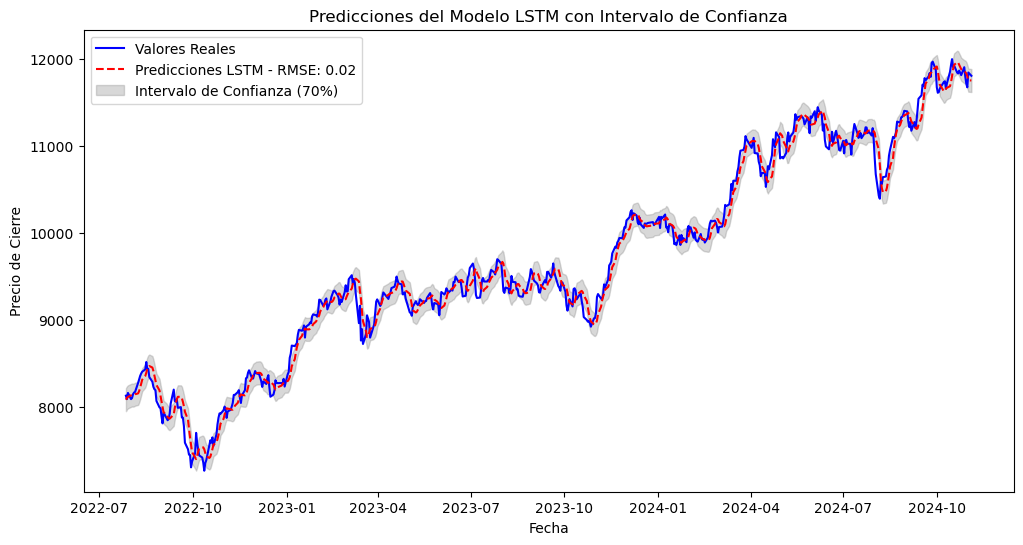

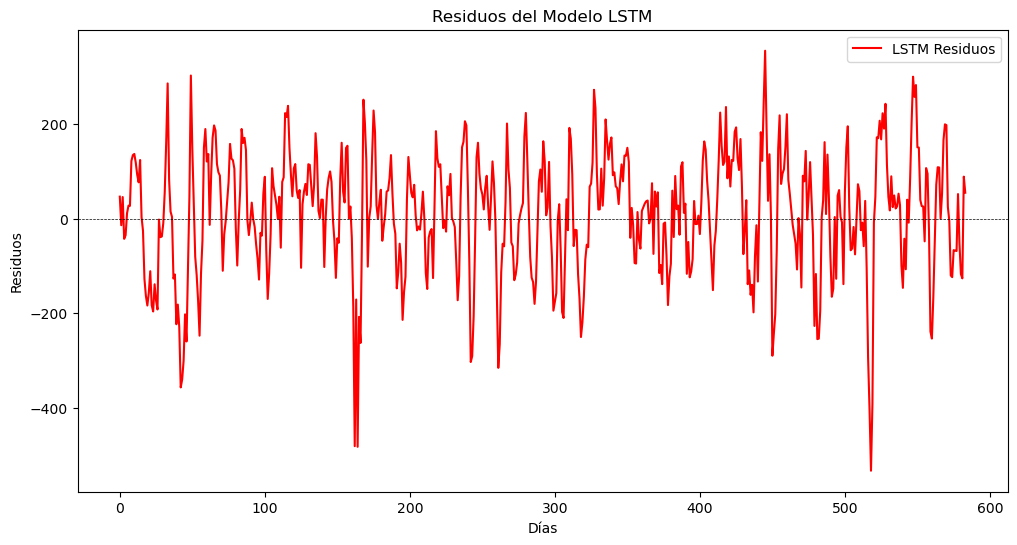

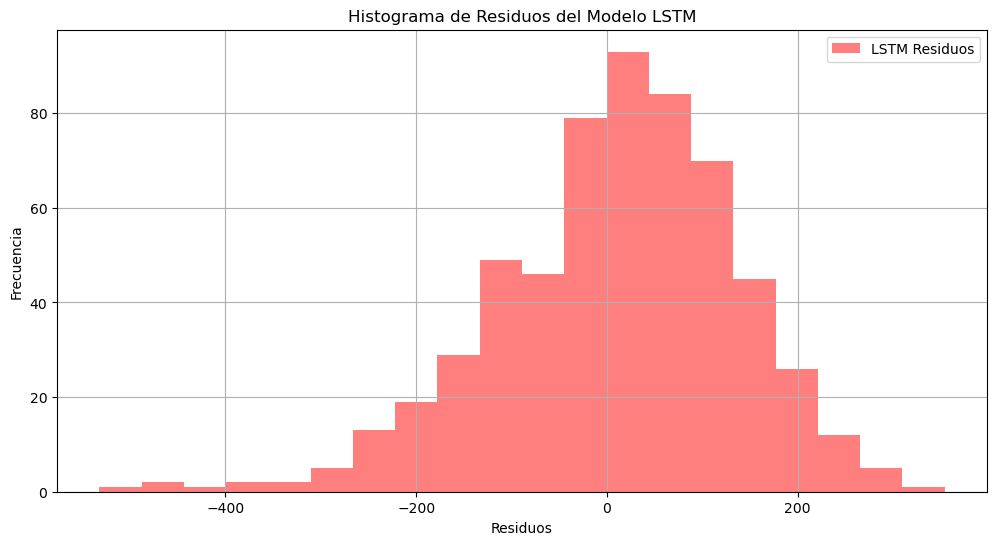

     Día  LSTM Residuos
0      0      46.170898
1      1     -14.165527
2      2      45.323242
3      3     -42.938477
4      4     -35.257324
..   ...            ...
579  579     -52.625977
580  580    -117.438477
581  581    -126.283203
582  582      88.358398
583  583      54.408203

[584 rows x 2 columns]
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step
Coeficiente de determinación R² en entrenamiento: 0.98
Coeficiente de determinación R² en prueba: 0.99


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Hacer predicciones con el modelo LSTM
predicted_prices = model.predict(X_test)

# Función para calcular métricas de evaluación
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calcular las métricas para el conjunto de prueba
lstm_metrics = calcular_metricas(y_test, predicted_prices)

# Imprimir las métricas
print("Métricas del Modelo LSTM:", lstm_metrics)
print(f"MSE: {lstm_metrics[0]}, MAE: {lstm_metrics[1]}, RMSE: {lstm_metrics[2]}, R²: {lstm_metrics[3]}")

# Escalado inverso
predicted_prices_unscaled = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular intervalo de confianza del 70%
z_value = 1.04  # Valor crítico para un intervalo de confianza del 70%
confidence_interval = z_value * np.std(y_test_unscaled - predicted_prices_unscaled)

# Crear los intervalos superior e inferior
upper_bound = predicted_prices_unscaled + confidence_interval
lower_bound = predicted_prices_unscaled - confidence_interval

# Extraer las fechas para el conjunto de prueba
test_dates = df_filtered.index[-len(y_test_unscaled):]

# Graficar los resultados con los intervalos de confianza
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_unscaled, label='Valores Reales', color='blue')
plt.plot(test_dates, predicted_prices_unscaled, label=f'Predicciones LSTM - RMSE: {lstm_metrics[2]:.2f}', linestyle='--', color='red')
plt.fill_between(test_dates, lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.3, label='Intervalo de Confianza (70%)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicciones del Modelo LSTM con Intervalo de Confianza del 70%')
plt.legend()
plt.show()


# Graficar los residuos
lstm_residuals = y_test_unscaled - predicted_prices_unscaled
plt.figure(figsize=(12, 6))
plt.plot(lstm_residuals, label='LSTM Residuos', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Días')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo LSTM')
plt.legend()
plt.show()

# Graficar histograma de los residuos
plt.figure(figsize=(12, 6))
plt.hist(lstm_residuals, bins=20, color='red', alpha=0.5, label='LSTM Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos del Modelo LSTM')
plt.legend()
plt.grid(True)
plt.show()

# Crear un DataFrame para los residuos
residuals_df = pd.DataFrame({
    'Día': np.arange(len(y_test_unscaled)),
    'LSTM Residuos': lstm_residuals.flatten()
})

# Mostrar la tabla de resultados de residuos
print(residuals_df)

# Calcular y mostrar el coeficiente R² en entrenamiento (opcional)
train_predictions = model.predict(X_train)
train_predictions_unscaled = scaler.inverse_transform(train_predictions)
r2_train = r2_score(scaler.inverse_transform(y_train), train_predictions_unscaled)
print(f'Coeficiente de determinación R² en entrenamiento: {r2_train:.2f}')
print(f'Coeficiente de determinación R² en prueba: {lstm_metrics[3]:.2f}')



In [16]:
#Guardar modelo
save_path = "modelo_lstm_ibex.h5"
model.save(save_path)
print(f"Modelo guardado en: {save_path}")

Modelo guardado en: modelo_lstm_ibex.h5


In [ ]:
'''import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
load_path = "modelo_lstm_ibex.h5"
model = load_model(load_path)

# Definir las ventanas de predicción
horizontes = [7, 30, 60]
errores_rmse = []

# Realizar el backtesting para cada ventana
for horizonte in horizontes:
    predictions = []
    actual_values = []

    # Iterar hacia atrás desde el final del conjunto de prueba
    for i in range(horizonte, len(X_test)):
        # Obtener la secuencia de prueba correspondiente
        last_sequence = X_test[i - horizonte]

        # Generar predicciones hacia adelante para el horizonte dado
        pred = []
        for _ in range(horizonte):
            next_pred = model.predict(np.expand_dims(last_sequence, axis=0))
            pred.append(next_pred[0][0])
            last_sequence = np.vstack((last_sequence[1:], next_pred))

        # Invertir la escala de las predicciones
        pred_unscaled = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
        predictions.extend(pred_unscaled.flatten())

        # Obtener los valores reales correspondientes
        actual = scaler.inverse_transform(y_test[i - horizonte:i].reshape(-1, 1))
        actual_values.extend(actual.flatten())

    # Calcular el error RMSE
    rmse = np.sqrt(mean_squared_error(actual_values, predictions))
    errores_rmse.append(rmse)
    print(f"RMSE para {horizonte} días: {rmse}")

# Graficar el error vs. horizonte de predicción
plt.figure(figsize=(10, 6))
plt.plot(horizontes, errores_rmse, marker='o', linestyle='--', color='r')
plt.xlabel('Horizonte de Predicción (días)')
plt.ylabel('RMSE')
plt.title('Error RMSE vs. Horizonte de Predicción')
plt.grid()
plt.show()'''


'import numpy as np\nimport pandas as pd\nfrom sklearn.metrics import mean_squared_error\nimport matplotlib.pyplot as plt\nfrom tensorflow.keras.models import load_model\n\n# Cargar el modelo guardado\nload_path = "modelo_lstm_ibex.h5"\nmodel = load_model(load_path)\n\n# Definir las ventanas de predicción\nhorizontes = [7, 30, 60]\nerrores_rmse = []\n\n# Realizar el backtesting para cada ventana\nfor horizonte in horizontes:\n    predictions = []\n    actual_values = []\n\n    # Iterar hacia atrás desde el final del conjunto de prueba\n    for i in range(horizonte, len(X_test)):\n        # Obtener la secuencia de prueba correspondiente\n        last_sequence = X_test[i - horizonte]\n\n        # Generar predicciones hacia adelante para el horizonte dado\n        pred = []\n        for _ in range(horizonte):\n            next_pred = model.predict(np.expand_dims(last_sequence, axis=0))\n            pred.append(next_pred[0][0])\n            last_sequence = np.vstack((last_sequence[1:], nex

#### Predicciones con LSTM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━

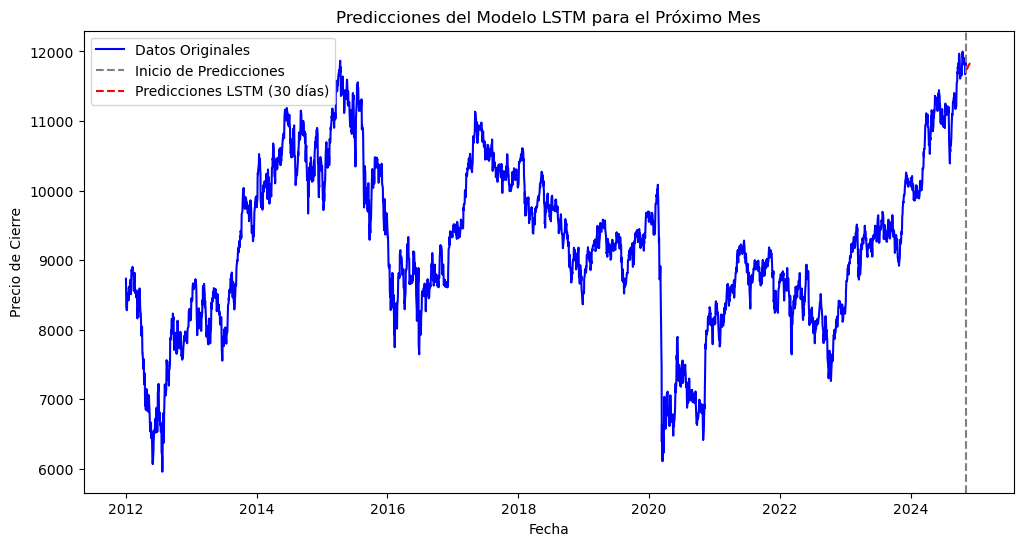

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Cargar el modelo entrenado
load_path = "modelo_lstm_ibex.h5"
model = load_model(load_path)

# Número de días a predecir (un mes completo)
prediction_days = 30

# Crear una lista para almacenar las predicciones
predictions = []

# Usar la última secuencia de datos para generar la primera predicción
last_sequence = X_test[-1].reshape(-1, 1)

# Generar predicciones día a día
for _ in range(prediction_days):
    # Hacer una predicción para el siguiente día
    next_pred = model.predict(np.expand_dims(last_sequence, axis=0))
    predictions.append(next_pred[0][0])  # Guardar la predicción
    
    # Actualizar la secuencia deslizante
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(-1, 1)

# Invertir la escala de las predicciones
predictions_unscaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Crear un rango de fechas para el próximo mes
last_date = df.index[-1]  # Última fecha en el DataFrame original
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=prediction_days, freq='D')

# Crear un DataFrame para las predicciones futuras
predictions_df = pd.DataFrame(data=predictions_unscaled, index=future_dates, columns=['Predicted Close'])

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Datos Originales', color='blue')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Inicio de Predicciones')
plt.plot(predictions_df, label='Predicciones LSTM (30 días)', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicciones del Modelo LSTM para el Próximo Mes')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━

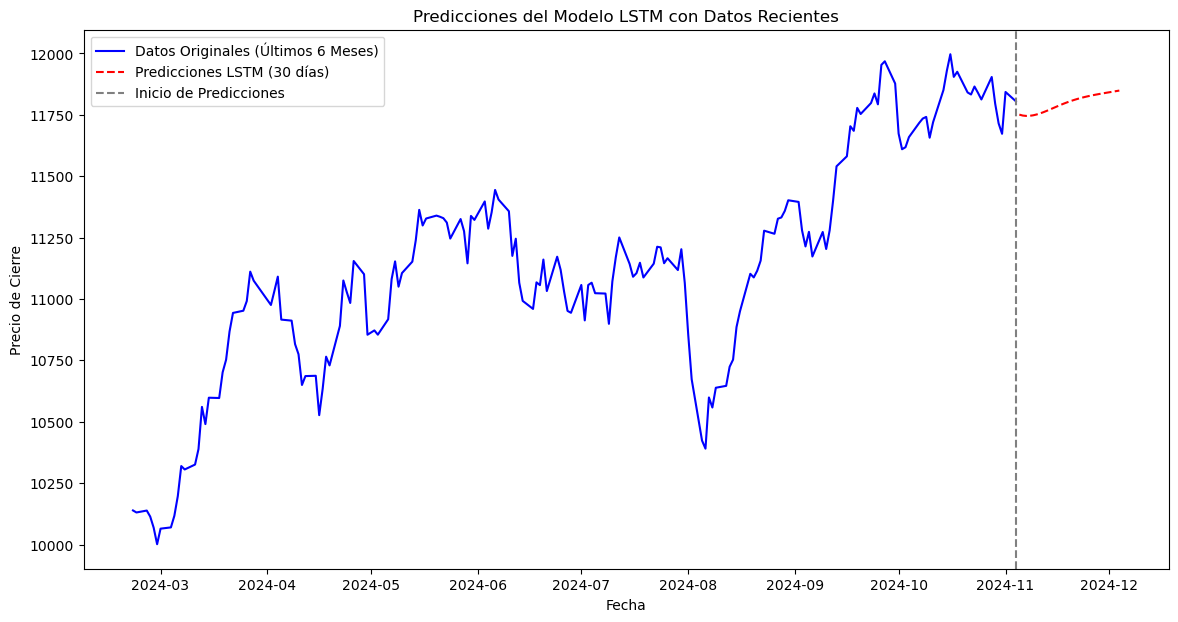

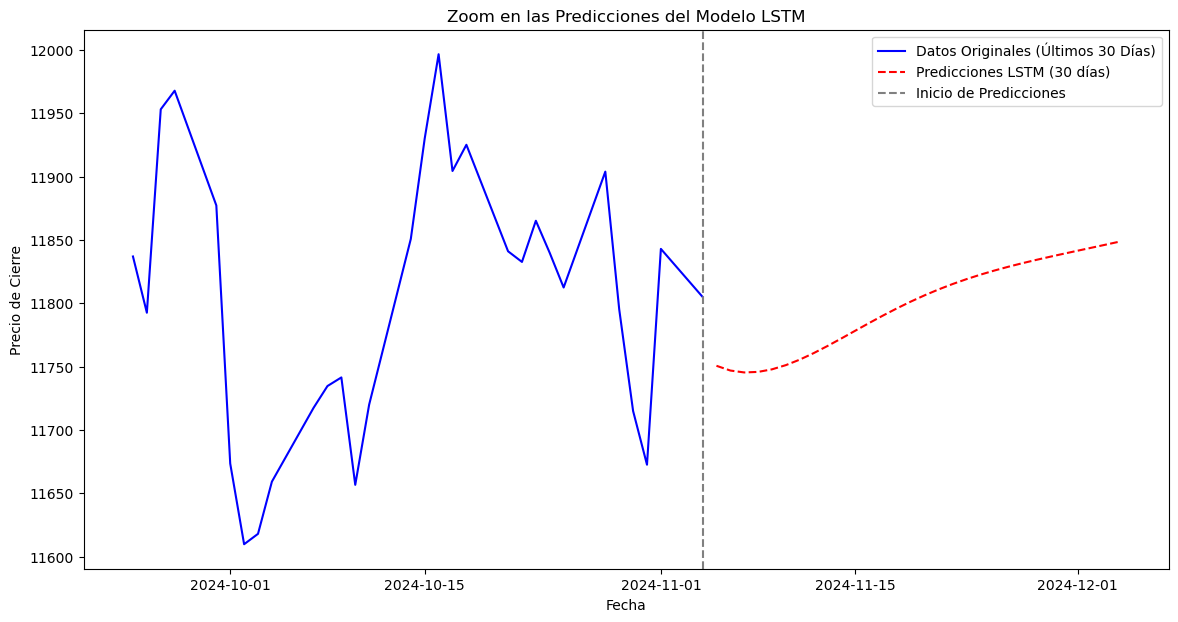

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Cargar el modelo LSTM
load_path = "modelo_lstm_ibex.h5"
model = load_model(load_path)

# Número de días a predecir
prediction_days = 30

# Lista para almacenar las predicciones
predictions = []

# Última secuencia para hacer las predicciones
last_sequence = X_test[-1].reshape(-1, 1)

# Generar predicciones
for _ in range(prediction_days):
    next_pred = model.predict(np.expand_dims(last_sequence, axis=0))
    predictions.append(next_pred[0][0])
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(-1, 1)

# Invertir el escalado de las predicciones
predictions_unscaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Crear fechas para las predicciones
last_date = df.index[-1]
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=prediction_days, freq='D')

# DataFrame de predicciones
predictions_df = pd.DataFrame(data=predictions_unscaled, index=future_dates, columns=['Predicted Close'])

# Crear una gráfica combinada de los últimos datos y las predicciones
plt.figure(figsize=(14, 7))

# Mostrar los últimos 6 meses de datos
last_6_months = df['Close'].iloc[-180:]  # Últimos 180 días (aproximadamente 6 meses)
plt.plot(last_6_months, label='Datos Originales (Últimos 6 Meses)', color='blue')

# Añadir las predicciones
plt.plot(predictions_df, label='Predicciones LSTM (30 días)', color='red', linestyle='--')

# Líneas verticales para marcar el inicio de las predicciones
plt.axvline(x=last_date, color='gray', linestyle='--', label='Inicio de Predicciones')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicciones del Modelo LSTM con Datos Recientes')
plt.legend()
plt.show()

# Gráfica de zoom en las predicciones
plt.figure(figsize=(14, 7))
plt.plot(df['Close'].iloc[-30:], label='Datos Originales (Últimos 30 Días)', color='blue')
plt.plot(predictions_df, label='Predicciones LSTM (30 días)', color='red', linestyle='--')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Inicio de Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Zoom en las Predicciones del Modelo LSTM')
plt.legend()
plt.show()
